<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-(EDA)-Module" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-Module-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA) Module</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Column-Description" data-toc-modified-id="Column-Description-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Column Description</a></span></li><li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Correlation Analysis</a></span></li><li><span><a href="#Column-Drill-down" data-toc-modified-id="Column-Drill-down-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Column Drill-down</a></span></li><li><span><a href="#Aggregate-Statistics" data-toc-modified-id="Aggregate-Statistics-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Aggregate Statistics</a></span></li></ul></li><li><span><a href="#Classification" data-toc-modified-id="Classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Train-&amp;-Test" data-toc-modified-id="Train-&amp;-Test-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Train &amp; Test</a></span></li><li><span><a href="#Model-Diagnosis" data-toc-modified-id="Model-Diagnosis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Model Diagnosis</a></span></li></ul></li></ul></div>

# Exploratory Data Analysis (EDA) Module

In [1]:
import os
import sys
import time
import json
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)
%precision 3
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import logging
logging.disable(logging.ERROR)

In [3]:
import edatools.eda_table as et
import edatools.ml_table as mt
import edatools.ml_bench as mb
import edatools.eda_display_utils as edu
import edatools.eda_bq_utils as ebu
from importlib import reload

## Load Data

In [4]:
titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

In [5]:
titanic['survived'] = titanic['survived'].replace({0:"Died", 1:"Survived"})

In [6]:
# import pandas_profiling
# profile = titanic.profile_report(style={'full_width':True})
# profile.to_file(output_file="profile_titanic.html")

In [7]:
eb = et.EDATable(titanic)

## Column Description

In [8]:
eb.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,Died,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,Survived,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,Survived,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,Survived,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,Died,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,Died,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,Died,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,Died,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,Survived,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,Survived,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [9]:
eb.colinfo()

,DataType,ValueCount,NullCount,0,1,2
survived,object,2,0,Died,Survived,Survived
pclass,int64,3,0,3,1,3
sex,object,2,0,male,female,female
age,float64,88,177,22,38,26
sibsp,int64,7,0,1,1,0
parch,int64,7,0,0,0,0
fare,float64,248,0,7.25,71.2833,7.925
embarked,object,3,2,S,C,S
class,object,3,0,Third,First,Third
who,object,3,0,man,woman,woman


In [10]:
eb.desc()

<Figure size 360x360 with 0 Axes>

In [11]:
eb.desc_detail(['fare', 'class', 'pclass', 'sex', 'survived'], figsize=(6,4));

,fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
10%,7.550000
25%,7.910400
50%,14.454200
75%,31.000000
90%,77.958300
max,512.329200


<Figure size 432x288 with 0 Axes>

## Correlation Analysis

In [12]:
eb.corr()

,pclass,age,sibsp,parch,fare,adult_male,alone
pclass,1,-0.362,-0.043,-0.023,-0.688,0.099,0.136
age,-0.362,1,-0.182,-0.254,0.135,0.258,0.167
sibsp,-0.043,-0.182,1,0.45,0.447,-0.308,-0.828
parch,-0.023,-0.254,0.45,1,0.41,-0.397,-0.684
fare,-0.688,0.135,0.447,0.41,1,-0.309,-0.531
adult_male,0.099,0.258,-0.308,-0.397,-0.309,1,0.405
alone,0.136,0.167,-0.828,-0.684,-0.531,0.405,1


In [13]:
eb.pairplot_scatter_with_hover("age", ["fare"], color='survived', hover_cols=['pclass', 'who', 'sex'], 
                               alpha=0.5, size=10, figsize=(800,400))

""


In [14]:
eb.pairplot_scatter_with_hover("age", ["fare"], color='sex', hover_cols=['pclass', 'who', 'survived'], 
                               alpha=0.5, size=10, figsize=(800,400))

""


,age,sibsp,parch,fare,adult_male,alone
fare,0.135051,0.447113,0.410074,1.0,-0.308894,-0.531472


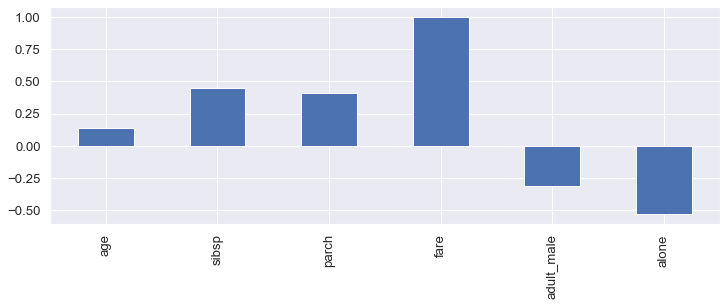

In [15]:
eb.corr_with('fare')

In [16]:
eb.pairplot(['pclass','fare','age'])

<Figure size 360x360 with 0 Axes>

In [17]:
eb.pairplot_scatter_with_hover("fare", "age", color='survived', hover_cols=['pclass', 'sex'], 
                               alpha=0.5, size=10, figsize=(600,400))

""


## Column Drill-down

You can also divide the table into sub-groups and run the same analysis as below

In [18]:
for e in eb.groupby("class"):
    e.corr(['who','fare','age'])
    e.desc(['who','fare','age'])

,fare,age
fare,1,-0.287
age,-0.287,1


,fare,age
fare,1,-0.165
age,-0.165,1


,fare,age
fare,1,-0.244
age,-0.244,1


<Figure size 360x360 with 0 Axes>

## Aggregate Statistics

In [19]:
FACETS = ['who', 'class', 'survived']
METRICS = ['fare', 'age']
ea = edu.agg_dataframe(titanic, FACETS, METRICS)
ea

,who,class,survived,sample_size,fare_avg,fare_sum,fare_ssq,fare_ci95,age_avg,age_sum,age_ssq,age_ci95
0,child,First,Died,1.0,151.550000,151.5500,2.296740e+04,NaN,2.000000,2.00,4.0000,NaN
1,child,First,Survived,5.0,136.949160,684.7458,1.031317e+05,42.392260,8.984000,44.92,558.8464,5.461325
2,child,Second,Survived,19.0,28.323905,538.1542,1.632377e+04,3.484785,4.543684,86.33,673.8267,1.778396
3,child,Third,Died,33.0,29.030179,957.9959,3.159641e+04,3.710944,7.378788,243.50,2417.2500,1.502423
4,child,Third,Survived,25.0,15.551004,388.7751,7.038297e+03,2.520737,6.076800,151.92,1547.3014,1.998961
5,man,First,Died,77.0,62.894910,4842.9081,5.786737e+05,13.413254,44.581967,2719.50,133782.2500,4.976969
6,man,First,Survived,42.0,71.554074,3005.2711,6.562763e+05,31.373821,38.756757,1434.00,61120.0000,5.208144
7,man,Second,Died,91.0,19.488965,1773.4958,5.680580e+04,3.229945,33.369048,2803.00,105802.5000,3.021492
8,man,Second,Survived,8.0,14.107812,112.8625,1.764669e+03,3.439184,36.666667,220.00,9110.0000,14.488212
9,man,Third,Died,281.0,10.793369,3032.9366,5.790309e+04,1.108500,29.209184,5725.00,189891.0000,1.891146


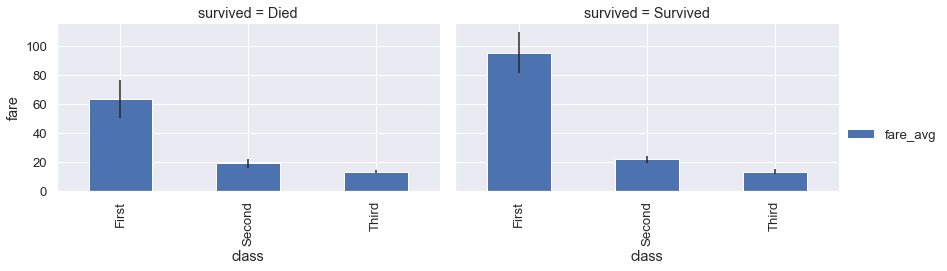

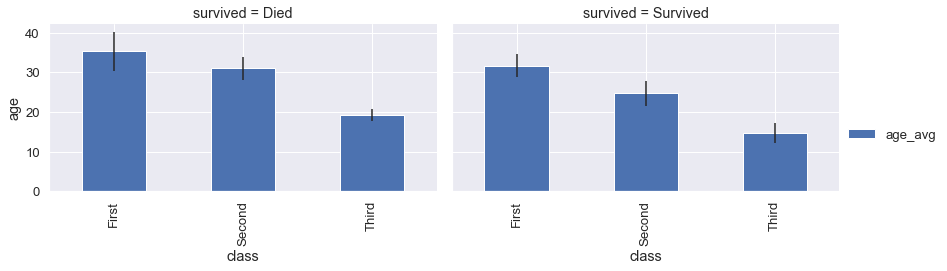

In [20]:
for m in METRICS:
    g = sns.FacetGrid(ea, col='survived', height=4, aspect=1.5)
    g.map_dataframe(edu.plot_facet_measure, "class", m, kind='bar', subplots=True)
    g.add_legend()

/Users/jkim4/pkg/Conda37/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning:

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.



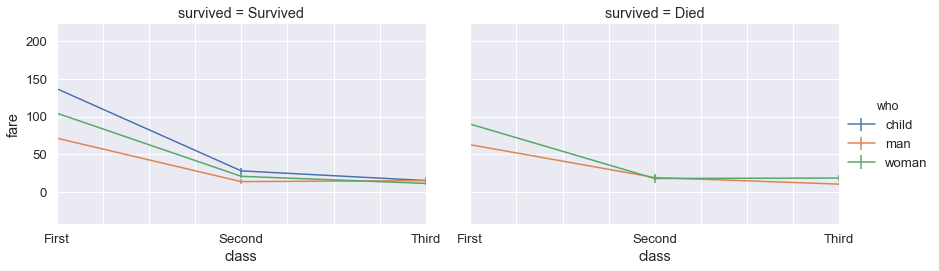

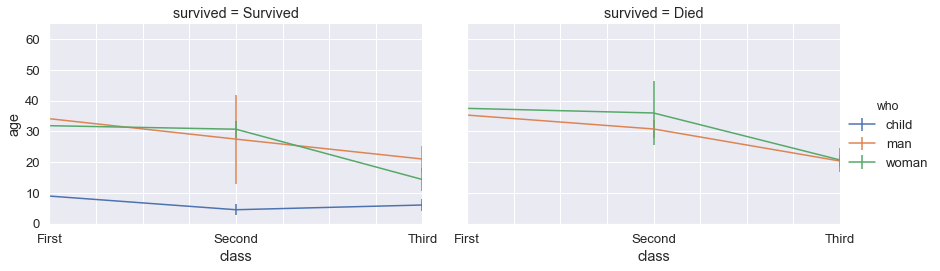

In [21]:
for m in METRICS:
    g = sns.FacetGrid(ea.dropna(), col='survived', hue='who', height=4, aspect=1.5)
    g.map_dataframe(edu.plot_facet_measure, "class", m, kind='line', verbose=False)
    g.add_legend()

# Classification

## Data Preparation

In [28]:
mt = mb.MLTable(titanic.drop(['alive', 'embark_town', 'adult_male', 'deck'], axis=1), "survived")

In [29]:
mt.normalize(topk=3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,alone
0,Died,3,male,22.00,1,0,7.2500,S,Third,man,False
1,Survived,1,female,38.00,1,0,71.2833,C,First,woman,False
2,Survived,3,female,26.00,0,0,7.9250,S,Third,woman,True
3,Survived,1,female,35.00,1,0,53.1000,S,First,woman,False
4,Died,3,male,35.00,0,0,8.0500,S,Third,man,True
5,Died,3,male,0.00,0,0,8.4583,Q,Third,man,True
6,Died,1,male,54.00,0,0,51.8625,S,First,man,True
7,Died,3,male,2.00,3,1,21.0750,S,Third,child,False
8,Survived,3,female,27.00,0,2,11.1333,S,Third,woman,False
9,Survived,2,female,14.00,1,0,30.0708,C,Second,child,False


In [30]:
mt.encode()

Using normalized table...


,survived,pclass,sex_female,sex_male,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,alone_False,alone_True
0,Died,3,0,1,22.00,1,0,7.2500,0,0,1,0,0,1,0,1,0,1,0
1,Survived,1,1,0,38.00,1,0,71.2833,1,0,0,1,0,0,0,0,1,1,0
2,Survived,3,1,0,26.00,0,0,7.9250,0,0,1,0,0,1,0,0,1,0,1
3,Survived,1,1,0,35.00,1,0,53.1000,0,0,1,1,0,0,0,0,1,1,0
4,Died,3,0,1,35.00,0,0,8.0500,0,0,1,0,0,1,0,1,0,0,1
5,Died,3,0,1,0.00,0,0,8.4583,0,1,0,0,0,1,0,1,0,0,1
6,Died,1,0,1,54.00,0,0,51.8625,0,0,1,1,0,0,0,1,0,0,1
7,Died,3,0,1,2.00,3,1,21.0750,0,0,1,0,0,1,1,0,0,1,0
8,Survived,3,1,0,27.00,0,2,11.1333,0,0,1,0,0,1,0,0,1,1,0
9,Survived,2,1,0,14.00,1,0,30.0708,1,0,0,0,1,0,1,0,0,1,0


In [31]:
mt.split()

Using encoded table...
Train Shape: (712, 19)
Test Shape: (179, 19)


## Train & Test

In [32]:
mlb = mb.MLBench()

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

mlb.add_table(mt)
mlb.add_model(mb.MLModel("RF_10", RandomForestClassifier(n_estimators=10)))
mlb.add_model(mb.MLModel("RF_100", RandomForestClassifier(n_estimators=100)))
mlb.add_model(mb.MLModel("LR", LogisticRegression(solver='liblinear')))

In [33]:
mlb.train_batch()

In [34]:
mlb.evaluate_batch()

,tbl_name,features,rows,model_name,accuracy,roc_auc,type1_error,type2_error
0,Default,11,891,RF_10,0.815642,0.872266,0.090909,0.333333
1,Default,11,891,RF_100,0.821229,0.891173,0.090909,0.318841
2,Default,11,891,LR,0.826816,0.882740,0.100000,0.289855


## Model Diagnosis

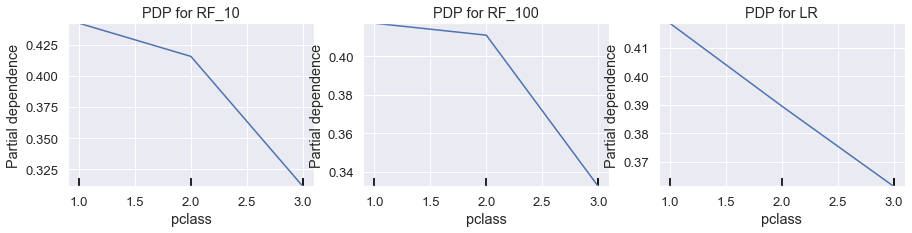

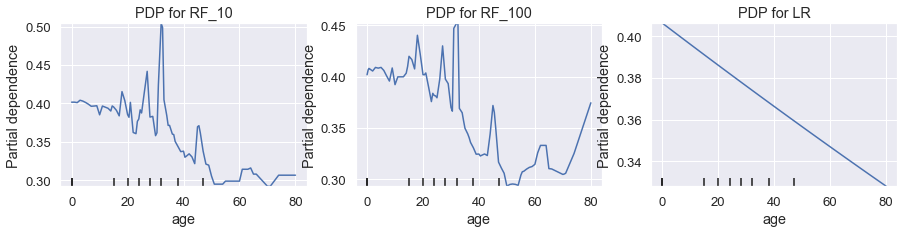

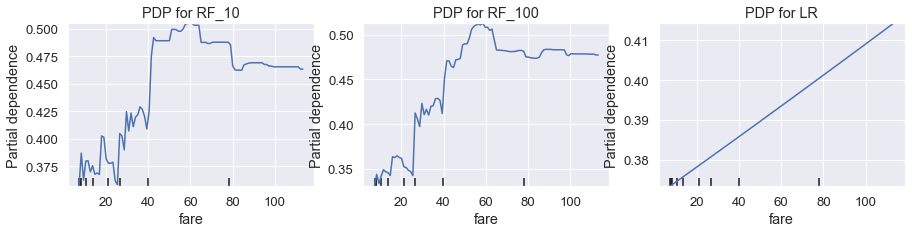

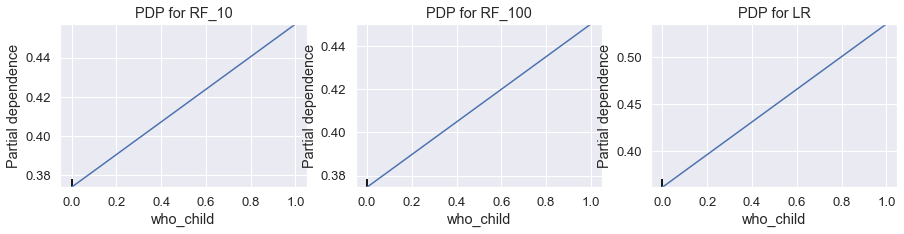

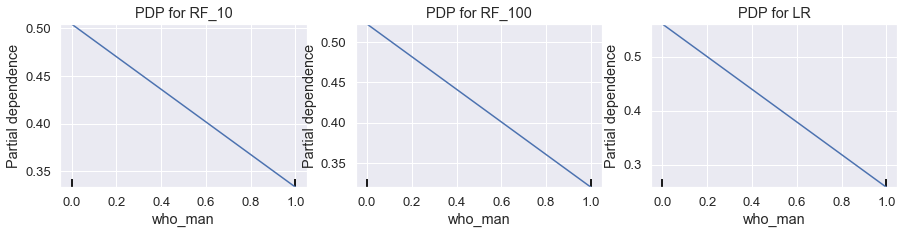

In [35]:
mlb.plot_partial_dependence(set(['pclass', 'age', 'fare', 'who_man', 'who_child']))

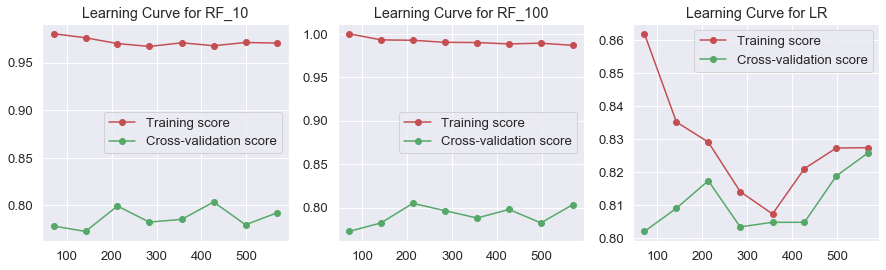

In [36]:
mlb.plot_learning_curve()